# ATIVIDADE SOMATIVA II:

PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ                          
DEPARTAMENTO DE TI                                
BIGDATA E INTELIGÊNCIA ANALÍTICA
DISCIPLINA OFICINA MAKER                        
ESTEVAN RAFAEL TOMAZINI                                      
PROFESSOR-TUTOR - GALBAS MILLEO FILHO

In [54]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt



In [57]:
# DataFrame
df = pd.read_csv('/content/dadosCleanML.csv' , encoding='latin-1', delimiter=';')



### encoding padrão/UTF-8 não permite importação.
### Apenas 'latin-1' funcionou

In [58]:
df

,Sexo,Tipo de Unidade,Descrição da Unidade,Descrição do Procedimento,Descrição do CBO,Descrição do CID,Solicitação de Exames,Encaminhamento para Atendimento Especialista,Desencadeou Internamento,Tratamento no Domicílio,Abastecimento,Energia Elétrica,Tipo de Habitação,Destino Lixo,Fezes/Urina,Municício,Bairro
0,M,UPA,UPA SITIO CERCADO,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,MEDICO CLINICO,NASOFARINGITE AGUDA [RESFRIADO COMUM],Nao,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,SITIO CERCADO
1,F,UPA,UPA SITIO CERCADO,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,MEDICO CLINICO,OUTRAS DORES ABDOMINAIS E AS NAO ESPECIFICADAS,Sim,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,MADEIRA APARELHADA,COLETADO,SISTEMA DE ESGOTO,CURITIBA,SITIO CERCADO
2,F,UPA,UPA SITIO CERCADO,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,MEDICO CLINICO,CISTITE AGUDA,Nao,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,SITIO CERCADO
3,M,UPA,UPA SITIO CERCADO,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,MEDICO CLINICO,NASOFARINGITE AGUDA [RESFRIADO COMUM],Sim,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,SITIO CERCADO
4,F,UPA,UPA TATUQUARA,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,MEDICO CLINICO,"ABSCESSO CUTANEO, FURUNCULO E ANTRAZ DA NADEGA",Sim,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,"DIRETO PARA RIO, LAGO OU MAR",CURITIBA,CAMPO DE SANTANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256096,M,BASICO,UMS BAIRRO ALTO,CONSULTA MEDICA EM ATENCAO PRIMARIA,MEDICO DE FAMILIA E COMUNIDADE,"TUBERCULOSE PULMONAR, SEM REALIZACAO DE EXAME ...",Sim,Sim,Nao,CLORACAO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,BAIRRO ALTO
256097,F,UPA,UPA BOA VISTA,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,MEDICO CLINICO,TONTURA E INSTABILIDADE,Sim,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,BACACHERI
256098,M,BASICO,UMS VILA MACHADO,CONSULTA MEDICA EM ATENCAO PRIMARIA,MEDICO GENERALISTA,EXAME MEDICO GERAL,Sim,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Sim,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,PINHEIRINHO
256099,M,BASICO,UMS DOM BOSCO PSF,AVALIACAO DO DESENVOLVIMENTO DA CRIANCA NA PUE...,MEDICO DA ESTRATEGIA DE SAUDE DA FAMILIA,PESSOA EM BOA SAUDE ACOMPANHANDO PESSOA DOENTE,Sim,Nao,Nao,SEM TRATAMENTO,REDE PÚBLICA,Nao,TIJOLO/ALVENARIA COM REVESTIMENTO,COLETADO,SISTEMA DE ESGOTO,CURITIBA,CAMPO DE SANTANA


# A intenção do modelo é criar um modelo de classificação (RandomForest) que leva em consideração os dados socioeconômicos dos pacientes do SUS Curitiba e os classifica quanto ao internamento. Seria um bom filtro para análise prévia, podendo salvar vidas e investimentos.

In [59]:
# Selecionando features (X) e variável alvo (y)
features = ['Tratamento no Domicílio', 'Abastecimento', 'Energia Elétrica', 'Tipo de Habitação', 'Destino Lixo', 'Fezes/Urina']
X = pd.get_dummies(df[features])  # Codificando variáveis categóricas
y = df['Desencadeou Internamento']


##'Sexo',	'Tipo de Unidade',	'Descrição da Unidade',	'Descrição do Procedimento'
##'Descrição do CBO',	'Descrição do CID',	'Solicitação de Exames'
##'Encaminhamento para Atendimento Especialista',	'Tratamento no Domicílio'
##'Abastecimento',	'Energia Elétrica',	'Tipo de Habitação',	'Destino Lixo'
##'Fezes/Urina',	'Municício'	'Bairro'


In [60]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # ou 'median' ou 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)


# Aplicando a imputação no conjunto de teste
X_test_imputed = imputer.transform(X_test)

# Fazendo previsões com o modelo
y_pred = rf_model.predict(X_test_imputed)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Garantindo que os rótulos correspondam

In [63]:
# Criando o modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [64]:
# Treinando o modelo
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Otimização de hiperparâmetros, utilizado no final.

In [69]:
# Realizando a otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.4s
[CV] END max_d

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=2)

In [70]:
# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [65]:
print(X_test.isnull().sum())

Tratamento no Domicílio_CLORACAO                       0
Tratamento no Domicílio_FERVURA                        0
Tratamento no Domicílio_FILTRACAO                      0
Tratamento no Domicílio_SEM TRATAMENTO                 0
Abastecimento_CARRO PIPA                               0
Abastecimento_CISTERNA                                 0
Abastecimento_OUTROS                                   0
Abastecimento_POÇO ARTESIANO                           0
Abastecimento_REDE PÚBLICA                             0
Energia Elétrica_Nao                                   0
Energia Elétrica_Sim                                   0
Tipo de Habitação_MADEIRA APARELHADA                   0
Tipo de Habitação_MATERIAL APROVEITADO                 0
Tipo de Habitação_OUTRO MATERIAL                       0
Tipo de Habitação_PALHA                                0
Tipo de Habitação_TAIPA COM REVESTIMENTO               0
Tipo de Habitação_TAIPA SEM REVESTIMENTO               0
Tipo de Habitação_TIJOLO ALVENA

In [66]:
y_pred = rf_model.predict(X_test)


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Convertendo 'Nao' e 'Sim' para 0 e 1
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred)

# Calculando ROC/AUC
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)

# Imprimindo as métricas
print("\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print("Relatório de Classificação:\n", classification_report(y_test_numeric, y_pred_numeric, zero_division=1))
print(f"ROC/AUC Score: {roc_auc:.4f}")


Métricas de Avaliação:
Acurácia: 0.9964
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51049
           1       1.00      0.00      0.00       172

    accuracy                           1.00     51221
   macro avg       1.00      0.50      0.50     51221
weighted avg       1.00      1.00      0.99     51221

ROC/AUC Score: 0.5000


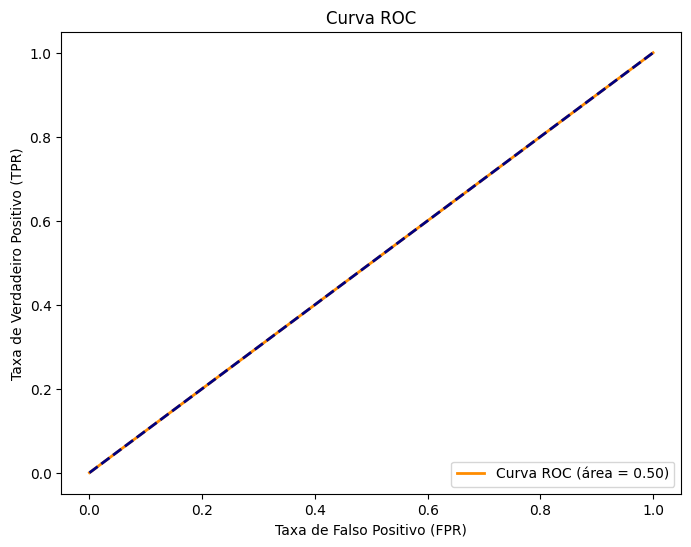

In [68]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Convertendo 'Nao' e 'Sim' para 0 e 1
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Calculo da curva ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)

# área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Curva ROC formando esse comportamento indica que as classes não explicam a feature escolhida. Pelo score perfeito, tudo indica que o modelo decorou os dados, overfiting.

# Agora vamos verificar qual o efeito da otimização dos hiperparâmetros:

In [71]:
## Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

rf_model_optimized = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=42  # Use um valor de semente aleatório para reproduzibilidade, se desejar
)

# Treinar o modelo otimizado no conjunto de treinamento
rf_model_optimized.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [72]:
y_pred = rf_model_optimized.predict(X_test)

In [74]:
# Convertendo 'Nao' e 'Sim' para 0 e 1
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)
y_pred_numeric = le.transform(y_pred)

# ROC/AUC
roc_auc = roc_auc_score(y_test_numeric, y_pred_numeric)

# métricas
print("\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.4f}")
print("Relatório de Classificação:\n", classification_report(y_test_numeric, y_pred_numeric, zero_division=1))
print(f"ROC/AUC Score: {roc_auc:.4f}")



Métricas de Avaliação:
Acurácia: 0.9966
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51049
           1       1.00      0.00      0.00       172

    accuracy                           1.00     51221
   macro avg       1.00      0.50      0.50     51221
weighted avg       1.00      1.00      0.99     51221

ROC/AUC Score: 0.5000


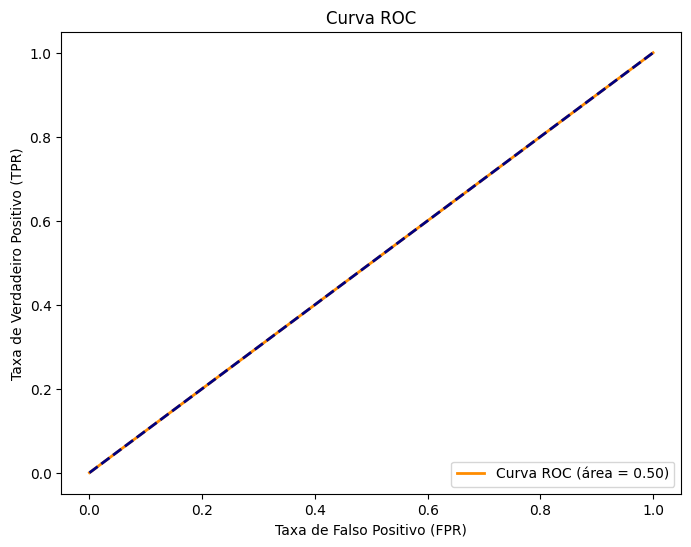

In [76]:
# Convertendo 'Nao' e 'Sim' para 0 e 1
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Calculando a curva ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)

# Calculando a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falso Positivo (FPR)')
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## É possível verificar que o método não pode otimizar esse modelo com os dados dispostos. As diversas entidades ordinais dificultam a obtenção de um modelo eficiente.